In [1]:
import sys
print('python version', sys.version.split('\n')[0])

python version 3.8.13 (default, Mar 28 2022, 06:16:26) 


# Import libraries

In [2]:
import numpy as np 
import pandas as pd
pd.set_option('display.float_format', lambda x:'%.4f' %x)

In [3]:
import math 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [5]:
import numpy as np 
import pandas as pd 
pd.options.display.float_format = "{:,.2f}".format
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import os

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Load data

In [7]:
TRAIN_PATH = "./widsdatathon2023/train_data.csv"
TEST_PATH = "./widsdatathon2023/test_data.csv"
SAMPLE_SUBMISSION_PATH = "./widsdatathon2023/sample_solution.csv"
SUBMISSION_PATH = "submission.csv"

In [8]:
train_df = pd.read_csv(TRAIN_PATH, parse_dates=["startdate"])
test_df = pd.read_csv(TEST_PATH, parse_dates=["startdate"])

train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.00,0.83,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.00,0.83,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.00,0.83,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.00,0.83,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.00,0.83,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [9]:
submit = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [10]:
train_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [11]:
train_df.dtypes

index                                          int64
lat                                          float64
lon                                          float64
startdate                             datetime64[ns]
contest-pevpr-sfc-gauss-14d__pevpr           float64
                                           ...      
wind-vwnd-925-2010-16                        float64
wind-vwnd-925-2010-17                        float64
wind-vwnd-925-2010-18                        float64
wind-vwnd-925-2010-19                        float64
wind-vwnd-925-2010-20                        float64
Length: 246, dtype: object

In [12]:
test_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.00,0.83,2022-11-01,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.00,0.83,2022-11-02,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.00,0.83,2022-11-03,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.00,0.83,2022-11-04,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.00,0.83,2022-11-05,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


### Dataset dimensions

In [13]:
print(f'Training dataset shape: {train_df.shape}')
print(f'Training dataset shape: {test_df.shape}')

Training dataset shape: (375734, 246)
Training dataset shape: (31354, 245)


In [14]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,"375,734.00","187,866.50","108,465.21",0.00,"93,933.25","187,866.50","281,799.75","375,733.00"
lat,"375,734.00",0.59,0.25,0.00,0.41,0.59,0.82,1.00
lon,"375,734.00",0.52,0.27,0.00,0.30,0.53,0.77,1.00
contest-pevpr-sfc-gauss-14d__pevpr,"375,734.00",276.74,198.09,-2.31,104.06,250.32,420.01,"1,185.14"
nmme0-tmp2m-34w__cancm30,"375,734.00",10.80,10.95,-14.96,1.55,9.95,20.23,36.08
...,...,...,...,...,...,...,...,...
wind-vwnd-925-2010-16,"375,734.00",-9.85,34.16,-106.08,-32.17,-8.56,10.50,83.89
wind-vwnd-925-2010-17,"375,734.00",-6.23,27.05,-93.98,-20.17,-6.03,11.63,64.85
wind-vwnd-925-2010-18,"375,734.00",16.01,25.85,-52.61,-0.36,18.65,31.21,90.39
wind-vwnd-925-2010-19,"375,734.00",10.49,25.07,-66.11,-6.79,11.86,29.04,76.89


### Drop duplicate rows

In [15]:
l0 = train_df.shape[0]
train_df.drop_duplicates(inplace=True)
l1 = train_df.shape[0]
print(f'{l0-l1} rows were dropped.')

0 rows were dropped.


# Target definition

In [16]:
target = 'contest-tmp2m-14d__tmp2m'

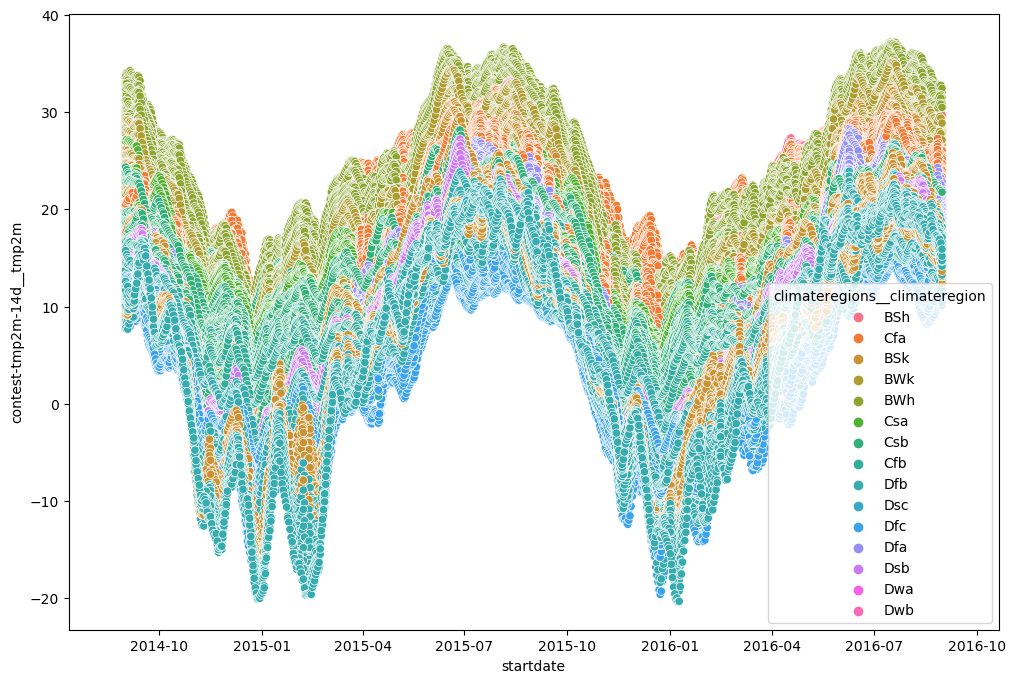

In [17]:
sns.scatterplot(x=train_df.startdate, y=train_df[target], hue=train_df.climateregions__climateregion, data=train_df)

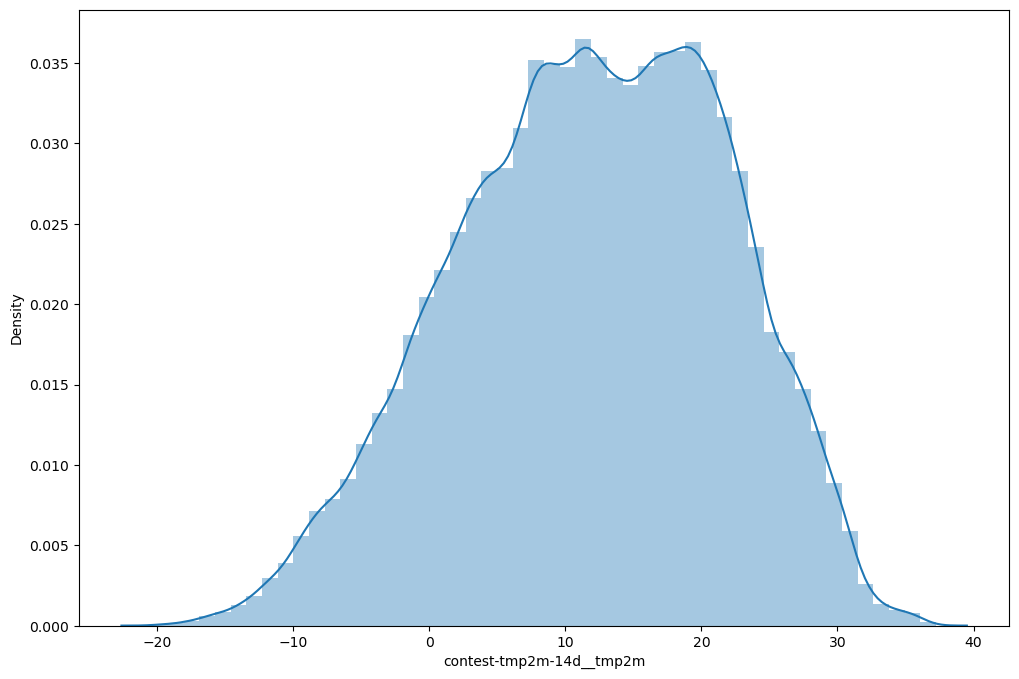

In [18]:
sns.distplot(train_df[target])

### Compute pair-wise correlation between continuous columns and drop one if this is greater than a threshold

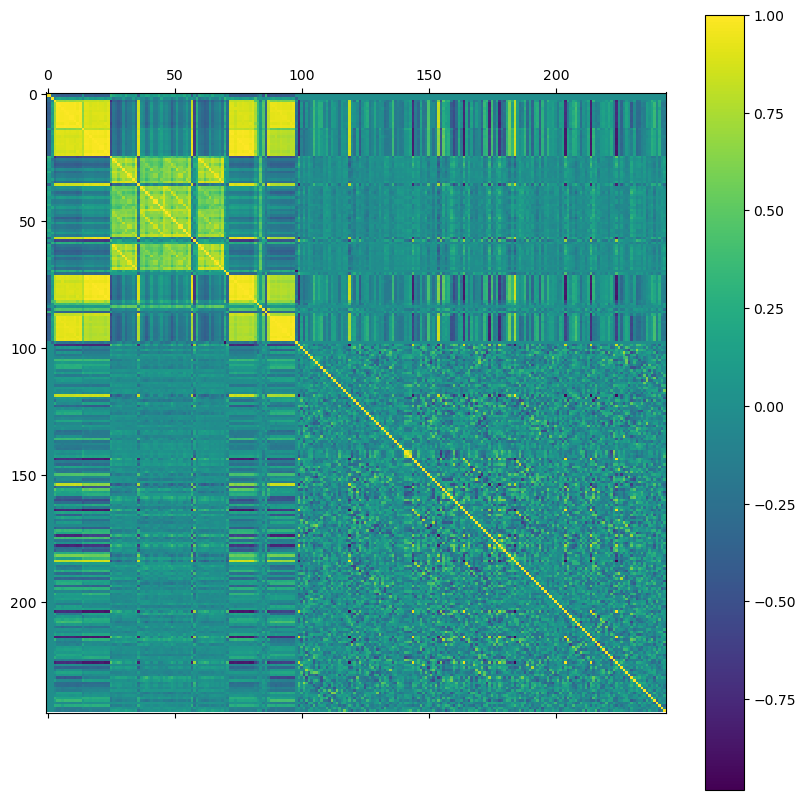

In [19]:
f = plt.figure(figsize=(10, 10))
plt.matshow(train_df.corr(), fignum=f.number)
plt.colorbar()
plt.show()

* many continuous columns with high correlation

## Find pair features with high correlations

In [20]:
def correlation(dataframe, threshold):
    high_corr = set() 
    drop = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and ((corr_matrix.columns[j], corr_matrix.columns[i]) not in high_corr):
                columns = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]) # getting the name of the columns
                high_corr.add(columns)
                drop.add(corr_matrix.columns[i])

    return high_corr, drop

In [21]:
thr = 0.9

high_corr, drop = correlation(train_df, thr)
print('These pairs have abosolute correlation greater than: ', thr)
print(high_corr)

These pairs have abosolute correlation greater than:  0.9
{('nmme-tmp2m-56w__ccsm4', 'nmme-tmp2m-56w__cancm4', 0.9834985581363944), ('nmme0mean', 'gfdlflora0', 0.989510007543417), ('nmme0mean', 'nmme0-tmp2m-34w__cancm40', 0.9333174424372155), ('wind-hgt-100-2010-1', 'wind-hgt-10-2010-1', 0.96757139840644), ('gfdlflorb0', 'nmme0-tmp2m-34w__gfdl0', 0.9290657792114575), ('nmme-tmp2m-34w__cancm3', 'nmme-tmp2m-56w__gfdlflora', 0.9758866423436896), ('contest-tmp2m-14d__tmp2m', 'nmme-tmp2m-56w__nmmemean', 0.9508654318323422), ('nmme0-tmp2m-34w__nmme0mean', 'nmme0-tmp2m-34w__cancm30', 0.9916092341827649), ('nmme-prate-56w__gfdlflorb', 'nmme-prate-34w__gfdlflora', 0.9157966888499096), ('nmme-tmp2m-34w__nasa', 'nmme-tmp2m-34w__gfdlflorb', 0.9647033315035368), ('nmme-tmp2m-34w__gfdlflora', 'nmme-tmp2m-56w__cancm4', 0.972612479771326), ('nmme-tmp2m-56w__nmmemean', 'nmme0-tmp2m-34w__cfsv20', 0.9108145645954994), ('cancm30', 'nmme0-tmp2m-34w__gfdlflora0', 0.9206995898489827), ('nmme-tmp2m-34w__ccsm4

In [22]:
print('Number of variables can be dropped:', len(drop))
drop

Number of variables can be dropped: 67


{'cancm30',
 'cancm40',
 'ccsm30',
 'ccsm40',
 'cfsv20',
 'contest-tmp2m-14d__tmp2m',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-wind-h500-14d__wind-hgt-500',
 'elevation__elevation',
 'gfdl0',
 'gfdlflora0',
 'gfdlflorb0',
 'icec-2010-1',
 'lat',
 'mei__meirank',
 'nasa0',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nmmemean',
 'nmme-prate-56w__cancm3',
 'nmme-prate-56w__cancm4',
 'nmme-prate-56w__ccsm3',
 'nmme-prate-56w__ccsm4',
 'nmme-prate-56w__cfsv2',
 'nmme-prate-56w__gfdl',
 'nmme-prate-56w__gfdlflora',
 'nmme-prate-56w__gfdlflorb',
 'nmme-prate-56w__nasa',
 'nmme-prate-56w__nmmemean',
 'nmme-tmp2m-34w__cancm3',
 'nmme-tmp2m-34w__cancm4',
 'nmme-tmp2m-34w__ccsm3',
 'nmme-tmp2m-34w__ccsm4',
 'nmme-tmp2m-34w__cfsv2',
 'nmme-tmp2m-34w__gfdl',
 'nmme-tmp2m-34w__gfdlflora',
 'nmme-tmp2m-34w__gfdlflorb',
 'nmme-tmp2m-34w__nasa',
 'nmme-tmp2m-34w__nmmemean',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2

In [23]:
# Exclude target
drop.remove(target)

In [24]:
# Exclude lat
drop.remove('lat')

## Exclude one of the high correlated pairs

In [25]:
to_drop = list(drop)

train_df.drop(columns=to_drop, axis=1, inplace=True)
test_df.drop(columns=to_drop, axis=1, inplace=True)

# Check shapes
print(f'Training dataset shape: {train_df.shape}')
print(f'Training dataset shape: {test_df.shape}')

Training dataset shape: (375734, 181)
Training dataset shape: (31354, 180)


# Data preparation

### Separate categorical and continuous features

In [26]:
categorical_columns = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
continuous_columns = train_df.dtypes[train_df.dtypes != "object"].index.tolist()

### Categorical variable

In [27]:
print(categorical_columns)

['climateregions__climateregion']


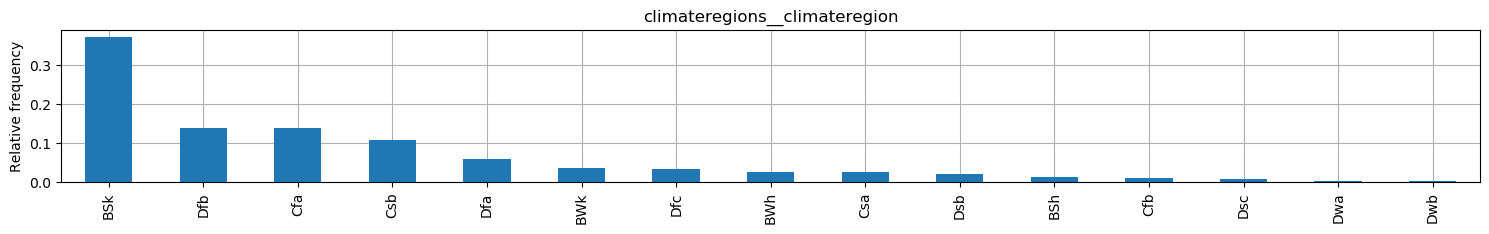

In [28]:
def plot_distbn(column, column_name, num):
    plt.subplot(num)
    column.value_counts(normalize=True).plot(kind='bar')
    plt.title(column_name)
    plt.ylabel('Relative frequency')
    plt.tight_layout()
    plt.grid(True)
    
    return column.value_counts(normalize=True)


plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(15,6))
relative_freq = plot_distbn(train_df[categorical_columns[0]], categorical_columns[0], 312)

In [29]:
relative_freq

BSk   0.37
Dfb   0.14
Cfa   0.14
Csb   0.11
Dfa   0.06
BWk   0.04
Dfc   0.03
BWh   0.03
Csa   0.03
Dsb   0.02
BSh   0.01
Cfb   0.01
Dsc   0.01
Dwa   0.00
Dwb   0.00
Name: climateregions__climateregion, dtype: float64

### Top 5 categories of climateregions__climateregion

In [30]:
sum(relative_freq[:5])

0.8190661478599222

In [31]:
significant = relative_freq.index[:5].tolist()
print(significant)

['BSk', 'Dfb', 'Cfa', 'Csb', 'Dfa']


* The top 5 values of climateregions__climateregion include ~ 82% of the data points. We will merge all other values into 'Others'.

### Category merge

In [32]:
train_df['climateregions__climateregion'].loc[~train_df['climateregions__climateregion'].isin(significant)] = 'Others'
test_df['climateregions__climateregion'].loc[~test_df['climateregions__climateregion'].isin(significant)] = 'Others'

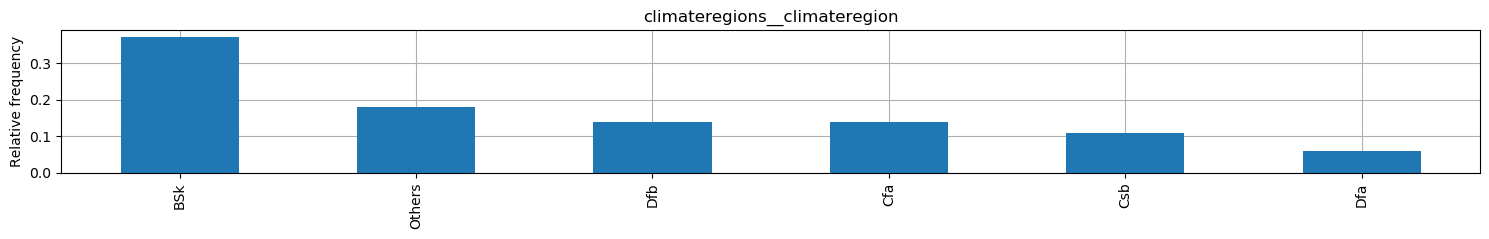

In [33]:
def plot_distbn(column, column_name, num):
    plt.subplot(num)
    column.value_counts(normalize=True).plot(kind='bar')
    plt.title(column_name)
    plt.ylabel('Relative frequency')
    plt.tight_layout()
    plt.grid(True)
    
    return column.value_counts(normalize=True)


plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(15,6))
rel_freqs2 = plot_distbn(train_df[categorical_columns[0]], categorical_columns[0], 312)

### Target distribution for different climateregions after category merge

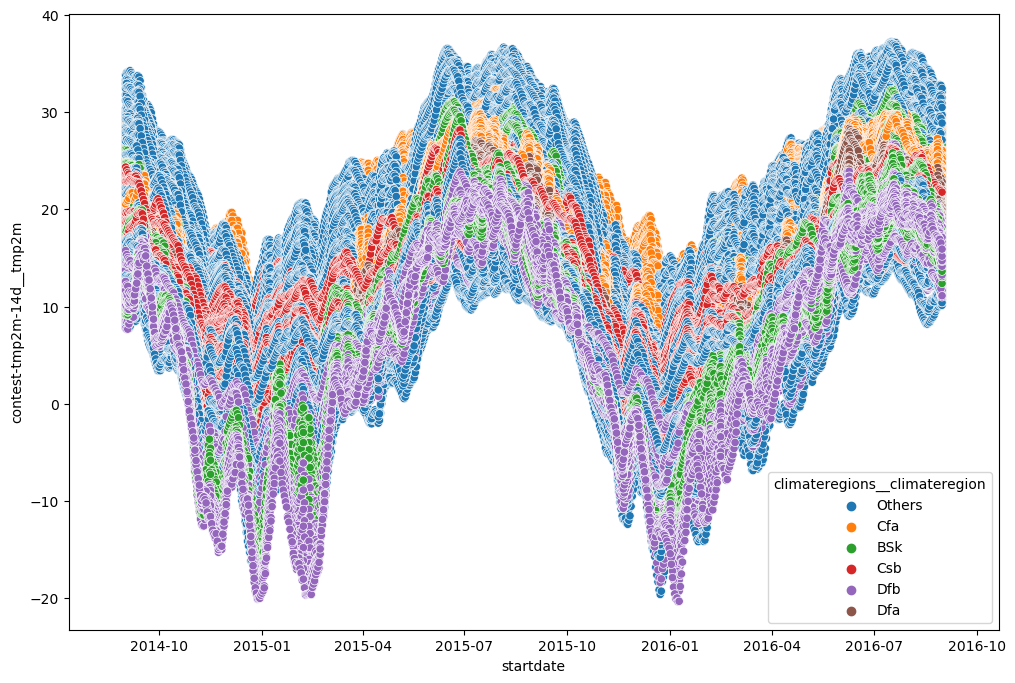

In [34]:
sns.scatterplot(x=train_df.startdate, y=train_df[target], hue=train_df.climateregions__climateregion, data=train_df)

### Check proportion of missing values in each column

In [35]:
def count_missing_values(dataframe):  
    total = dataframe.isnull().sum()
    percent = (dataframe.isnull().sum())*100/(len(dataframe))
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data['Total'] > 0]
    missing_data.sort_values('Total', ascending=False, inplace=True)
    print(missing_data)
    
    return 

count_missing_values(train_df)

                         Total  Percent
nmme0-prate-56w__ccsm30  15934     4.24
nmme0-prate-34w__ccsm30  15934     4.24
nmme-prate-34w__ccsm3     8738     2.33


In [36]:
count_missing_values(test_df)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [37]:
def impute_missing(df):
    df = df.sort_values(by=['startdate']).ffill()
    df[continuous_columns] = df[continuous_columns].fillna(df[continuous_columns].median())
    return df

In [38]:
def derive_features(df):
    df['year'] = df['startdate'].dt.year
    df['month'] = df['startdate'].dt.month
    df['day_of_year'] = df['startdate'].dt.dayofyear
    return df

In [39]:
def location_nom(train, test):
    # Ref: https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved
    scale = 14

    train.loc[:,'lat']=round(train.lat,scale)
    train.loc[:,'lon']=round(train.lon,scale)
    test.loc[:,'lat']=round(test.lat,scale)
    test.loc[:,'lon']=round(test.lon,scale)

    all_df = pd.concat([train, test], axis=0)
    all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
    train = all_df.iloc[:len(train)]
    test = all_df.iloc[len(train):].drop(target, axis=1)
    
    return train, test

In [40]:
def categorical_encode(train, test):
    le = LabelEncoder()
    train['climateregions__climateregion'] = le.fit_transform(train['climateregions__climateregion'])
    test['climateregions__climateregion'] = le.transform(test['climateregions__climateregion'])
    return train, test

In [41]:
def feature_engineering(train, test):
    train, test = location_nom(train, test)
    train = impute_missing(train)
    
    train = derive_features(train)
    test = derive_features(test)
    
    train, test = categorical_encode(train, test)

    drop_cols = ['index', 'startdate', 'lat', 'lon', target]
    
    predictors = [col for col in train.columns if col not in drop_cols]
    
    X = train[predictors]
    y = train[target]
    
    X_test = test[predictors]

    return X, y, X_test

In [42]:
X, y, X_test = feature_engineering(train_df.copy(), test_df.copy())

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'Training Shape: {X_train.shape}    |   Validation Shape: {X_val.shape}    |   Test Shape: {X_test.shape}')

Training Shape: (281800, 180)    |   Validation Shape: (93934, 180)    |   Test Shape: (31354, 180)


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)

lr_train_r_sq = linear_model.score(X_train, y_train)
lr_val_r_sq = linear_model.score(X_val, y_val)

predictions_val = linear_model.predict(X_val)
lr_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = linear_model.predict(X_train)
lr_train_mse = mean_squared_error(y_train, predictions_train)

    
print("\nLinear Regression: Validation set R-Squared: {:5.4f} ".format(abs(lr_val_r_sq)))    
print("Linear Regression: Training set R-Squared: {:5.4f} ".format(abs(lr_train_r_sq))) 

print("\nLinear Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(lr_val_mse)))
print("Linear Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(lr_train_mse)))


Linear Regression: Validation set R-Squared: 0.9670 
Linear Regression: Training set R-Squared: 0.9667 

Linear Regression: Validation set RMSE: 1.7928 
Linear Regression: Training set RMSE: 1.7994 


In [45]:
submit[target] = linear_model.predict(X_test)
submit.to_csv('linear_submission.csv', index = False)

# Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=10, random_state=0)

tree_model = tree_model.fit(X_train, y_train)

print(tree_model)
tree_train_r_sq = tree_model.score(X_train, y_train)
tree_val_r_sq = tree_model.score(X_val, y_val)

predictions_val = tree_model.predict(X_val)
tree_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = tree_model.predict(X_train)
tree_train_mse = mean_squared_error(y_train, predictions_train)

    
print("\nDecisionTree Regression: Validation set R-Squared: {:5.4f} ".format(abs(tree_val_r_sq)))    
print("DecisionTree Regression: Training set R-Squared: {:5.4f} ".format(abs(tree_train_r_sq))) 

print("\nDecisionTree Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(tree_val_mse)))
print("DecisionTree Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(tree_train_mse)))

DecisionTreeRegressor(max_depth=10, random_state=0)

DecisionTree Regression: Validation set R-Squared: 0.9627 
DecisionTree Regression: Training set R-Squared: 0.9643 

DecisionTree Regression: Validation set RMSE: 1.9073 
DecisionTree Regression: Training set RMSE: 1.8651 


In [47]:
submit[target] = linear_model.predict(X_test)
submit.to_csv('tree_submission.csv', index = False)

# Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=20)

rf_model = rf_model.fit(X_train, y_train)

rf_train_r_sq = rf_model.score(X_train, y_train)
rf_val_r_sq = rf_model.score(X_val, y_val)

predictions_val = rf_model.predict(X_val)
rf_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = rf_model.predict(X_train)
rf_train_mse = mean_squared_error(y_train, predictions_train)


print("\nRandom Forest Regression: Validation set R-Squared: {:5.4f} ".format(abs(rf_val_r_sq)))    
print("Random Forest Regression: Training set R-Squared: {:5.4f} ".format(abs(rf_train_r_sq))) 


print("\nRandom Forest Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(rf_val_mse)))
print("Random Forest Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(rf_train_mse)))


Random Forest Regression: Validation set R-Squared: 0.9719 
Random Forest Regression: Training set R-Squared: 0.9731 

Random Forest Regression: Validation set RMSE: 1.6556 
Random Forest Regression: Training set RMSE: 1.6191 


In [49]:
submit[target] = rf_model.predict(X_test)
submit.to_csv('rf_submission.csv', index = False)

# MLPRegressor

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")

est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(hidden_layer_sizes=(40,),
                 activation='relu', 
                 solver='adam', 
                 learning_rate_init=0.01,
                 max_iter=20,
                 early_stopping=True,
                 n_iter_no_change=5,
                 verbose=True,
                random_state=0)
)
est.fit(X_train, y_train)

mlp_train_r_sq = est.score(X_train, y_train)
mlp_val_r_sq = est.score(X_val, y_val)

predictions_val = est.predict(X_val)
mlp_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = est.predict(X_train)
mlp_train_mse = mean_squared_error(y_train, predictions_train)


print("\nMLPRegressor Regression: Validation set R-Squared: {:5.4f} ".format(abs(mlp_val_r_sq)))    
print("MLPRegressort Regression: Training set R-Squared: {:5.4f} ".format(abs(mlp_train_r_sq))) 


print("\nMLPRegressor Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(mlp_val_mse)))
print("MLPRegressor Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(mlp_train_mse)))

Training MLPRegressor...
Iteration 1, loss = 3.91194920
Validation score: 0.957382
Iteration 2, loss = 2.06862950
Validation score: 0.961134
Iteration 3, loss = 1.93593098
Validation score: 0.960607
Iteration 4, loss = 1.76702743
Validation score: 0.965860
Iteration 5, loss = 1.56925497
Validation score: 0.968544
Iteration 6, loss = 1.46074675
Validation score: 0.938384
Iteration 7, loss = 1.43141457
Validation score: 0.966800
Iteration 8, loss = 1.38570499
Validation score: 0.967581
Iteration 9, loss = 1.36756714
Validation score: 0.968653
Iteration 10, loss = 1.33412061
Validation score: 0.973414
Iteration 11, loss = 1.32501004
Validation score: 0.974104
Iteration 12, loss = 1.28397295
Validation score: 0.972871
Iteration 13, loss = 1.25656110
Validation score: 0.973465
Iteration 14, loss = 1.19034447
Validation score: 0.970837
Iteration 15, loss = 1.15485843
Validation score: 0.976759
Iteration 16, loss = 1.13781366
Validation score: 0.977698
Iteration 17, loss = 1.10832515
Validati

In [51]:
submit[target] = est.predict(X_test)
submit.to_csv('nn_submission.csv', index = False)

# Catboost

In [52]:
from catboost import CatBoostRegressor
cat_boost = CatBoostRegressor(verbose=200, iterations=1500, random_state=1234)

print(cat_boost.get_params())

cat_boost.fit(X_train, y_train)

cat_boost_train_r_sq = cat_boost.score(X_train, y_train)
cat_boost_val_r_sq = cat_boost.score(X_val, y_val)

predictions_val = cat_boost.predict(X_val)
cat_boost_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = cat_boost.predict(X_train)
cat_boost_train_mse = mean_squared_error(y_train, predictions_train)


print("\nCat_boostRegression: Validation set R-Squared: {:5.4f} ".format(abs(cat_boost_val_r_sq)))    
print("cat_boost Regression: Training set R-Squared: {:5.4f} ".format(abs(cat_boost_train_r_sq))) 


print("\ncat_boost Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(cat_boost_val_mse)))
print("cat_boost Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(cat_boost_train_mse)))


{'iterations': 1500, 'loss_function': 'RMSE', 'verbose': 200, 'random_state': 1234}
Learning rate set to 0.071797
0:	learn: 9.2671267	total: 121ms	remaining: 3m 1s
200:	learn: 1.3981061	total: 10.9s	remaining: 1m 10s
400:	learn: 1.1154501	total: 21.2s	remaining: 58.1s
600:	learn: 0.9567765	total: 31.8s	remaining: 47.6s
800:	learn: 0.8536264	total: 42s	remaining: 36.7s
1000:	learn: 0.7791946	total: 53.1s	remaining: 26.5s
1200:	learn: 0.7200417	total: 1m 4s	remaining: 16s
1400:	learn: 0.6727557	total: 1m 14s	remaining: 5.29s
1499:	learn: 0.6535768	total: 1m 20s	remaining: 0us

Cat_boostRegression: Validation set R-Squared: 0.9953 
cat_boost Regression: Training set R-Squared: 0.9956 

cat_boost Regression: Validation set RMSE: 0.6779 
cat_boost Regression: Training set RMSE: 0.6536 


In [53]:
submit[target] = cat_boost.predict(X_test)
submit.to_csv('cat_boost_submission.csv', index = False)

# Feature Importance

Text(0.5, 1.0, 'Feature Importance')

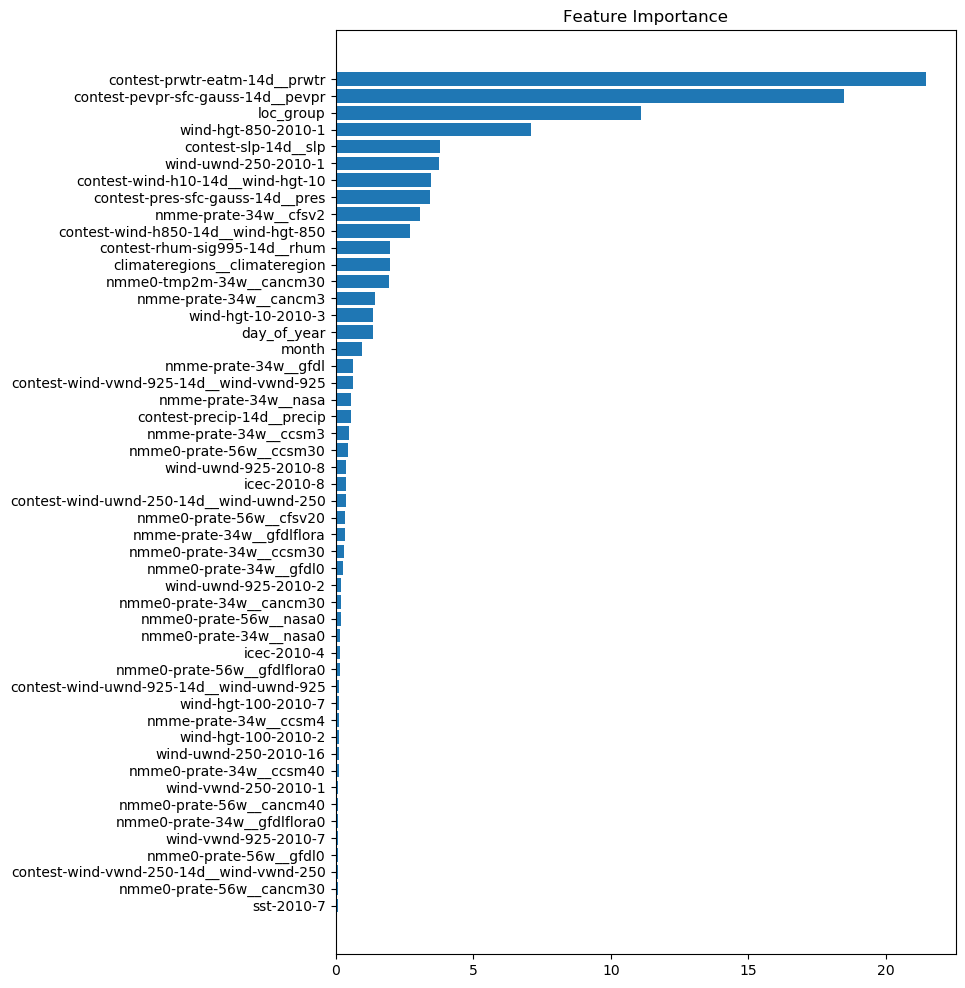

In [54]:
import matplotlib.pyplot as plt
feature_importance = cat_boost.feature_importances_
max_features = 50
sorted_idx = np.argsort(feature_importance)[-max_features:]
fig = plt.figure(figsize=(8, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

# Combine all models

In [55]:
val_error=[rf_val_mse, tree_val_mse, lr_val_mse, mlp_val_mse, cat_boost_val_mse]

val_rmse=[math.sqrt(rf_val_mse), math.sqrt(tree_val_mse), math.sqrt(lr_val_mse), math.sqrt(mlp_val_mse), math.sqrt(cat_boost_val_mse)]

train_rmse=[math.sqrt(rf_train_mse), math.sqrt(tree_train_mse), math.sqrt(lr_train_mse), math.sqrt(mlp_train_mse), math.sqrt(cat_boost_train_mse)]

val_r2=[rf_val_r_sq, tree_val_r_sq, lr_val_r_sq, mlp_val_r_sq, cat_boost_val_r_sq]

train_r2=[rf_train_r_sq, tree_train_r_sq, lr_train_r_sq, mlp_train_r_sq, cat_boost_train_r_sq]

col={'Validation RMSE':val_rmse, 'Train RMSE':train_rmse, 'Validation R-Squared':val_r2, 'Train R-Squared':train_r2}

models=['Random Forest', 'Decision Tree', 'Linear', 'MLPRegressor(sklearn)', 'CatBoost']
df=pd.DataFrame(data=col,index=models)
df.sort_values('Validation RMSE', inplace = True)
df

,Validation RMSE,Train RMSE,Validation R-Squared,Train R-Squared
CatBoost,0.68,0.65,1.00,1.00
MLPRegressor(sklearn),1.47,1.46,0.98,0.98
Random Forest,1.66,1.62,0.97,0.97
Linear,1.79,1.80,0.97,0.97
Decision Tree,1.91,1.87,0.96,0.96
